In [69]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt



from sklearn.model_selection import train_test_split

#Importing the classifiers that we wil test 
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#Importing performance metrix to evaluate our models

from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

c:\python\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [59]:
#Qui lavoro di har code per semplicita dei tre file
#Nel futuro riutilizzerò del codice per la lettura automatica dei tre file 
file_1='datatraining.txt'
file_2='datatest.txt'
file_3='datatest2.txt'

df_train=pd.read_csv(file_1)
df_train.name="Training DataSet"
df_test=pd.read_csv(file_2)
df_test.name="Test DataSet"
df_ratio=len(df_train)/(len(df_train)+len(df_test))
print("ratio between train and test is",df_ratio)
def exploration(dataframe): 
    print(dataframe.name)
    print(dataframe.info())
    print(dataframe.describe())
    print(dataframe.head(5))
    print(dataframe.tail(5))
exploration(df_train)
exploration(df_test)


ratio between train and test is 0.7534233900814211
Training DataSet
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8143 entries, 1 to 8143
Data columns (total 7 columns):
date             8143 non-null object
Temperature      8143 non-null float64
Humidity         8143 non-null float64
Light            8143 non-null float64
CO2              8143 non-null float64
HumidityRatio    8143 non-null float64
Occupancy        8143 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 508.9+ KB
None
       Temperature     Humidity        Light          CO2  HumidityRatio  \
count  8143.000000  8143.000000  8143.000000  8143.000000    8143.000000   
mean     20.619084    25.731507   119.519375   606.546243       0.003863   
std       1.016916     5.531211   194.755805   314.320877       0.000852   
min      19.000000    16.745000     0.000000   412.750000       0.002674   
25%      19.700000    20.200000     0.000000   439.000000       0.003078   
50%      20.390000    26.222500

Dall'esito dell'analisi preliminare sappiamo che il rapporto tra il campione di training e il campione di allenamento è 75/25.

In [60]:
#Convertiamo in timestamp la colonna 'Date' per una migliore manipolazione, nel caso fosse necessaria 
datetime=pd.to_datetime(df_train.date)
df_train['date']=datetime
print(df_train.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8143 entries, 1 to 8143
Data columns (total 7 columns):
date             8143 non-null datetime64[ns]
Temperature      8143 non-null float64
Humidity         8143 non-null float64
Light            8143 non-null float64
CO2              8143 non-null float64
HumidityRatio    8143 non-null float64
Occupancy        8143 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 508.9 KB
None


Temperature
Humidity
Light
CO2
HumidityRatio
Occupancy


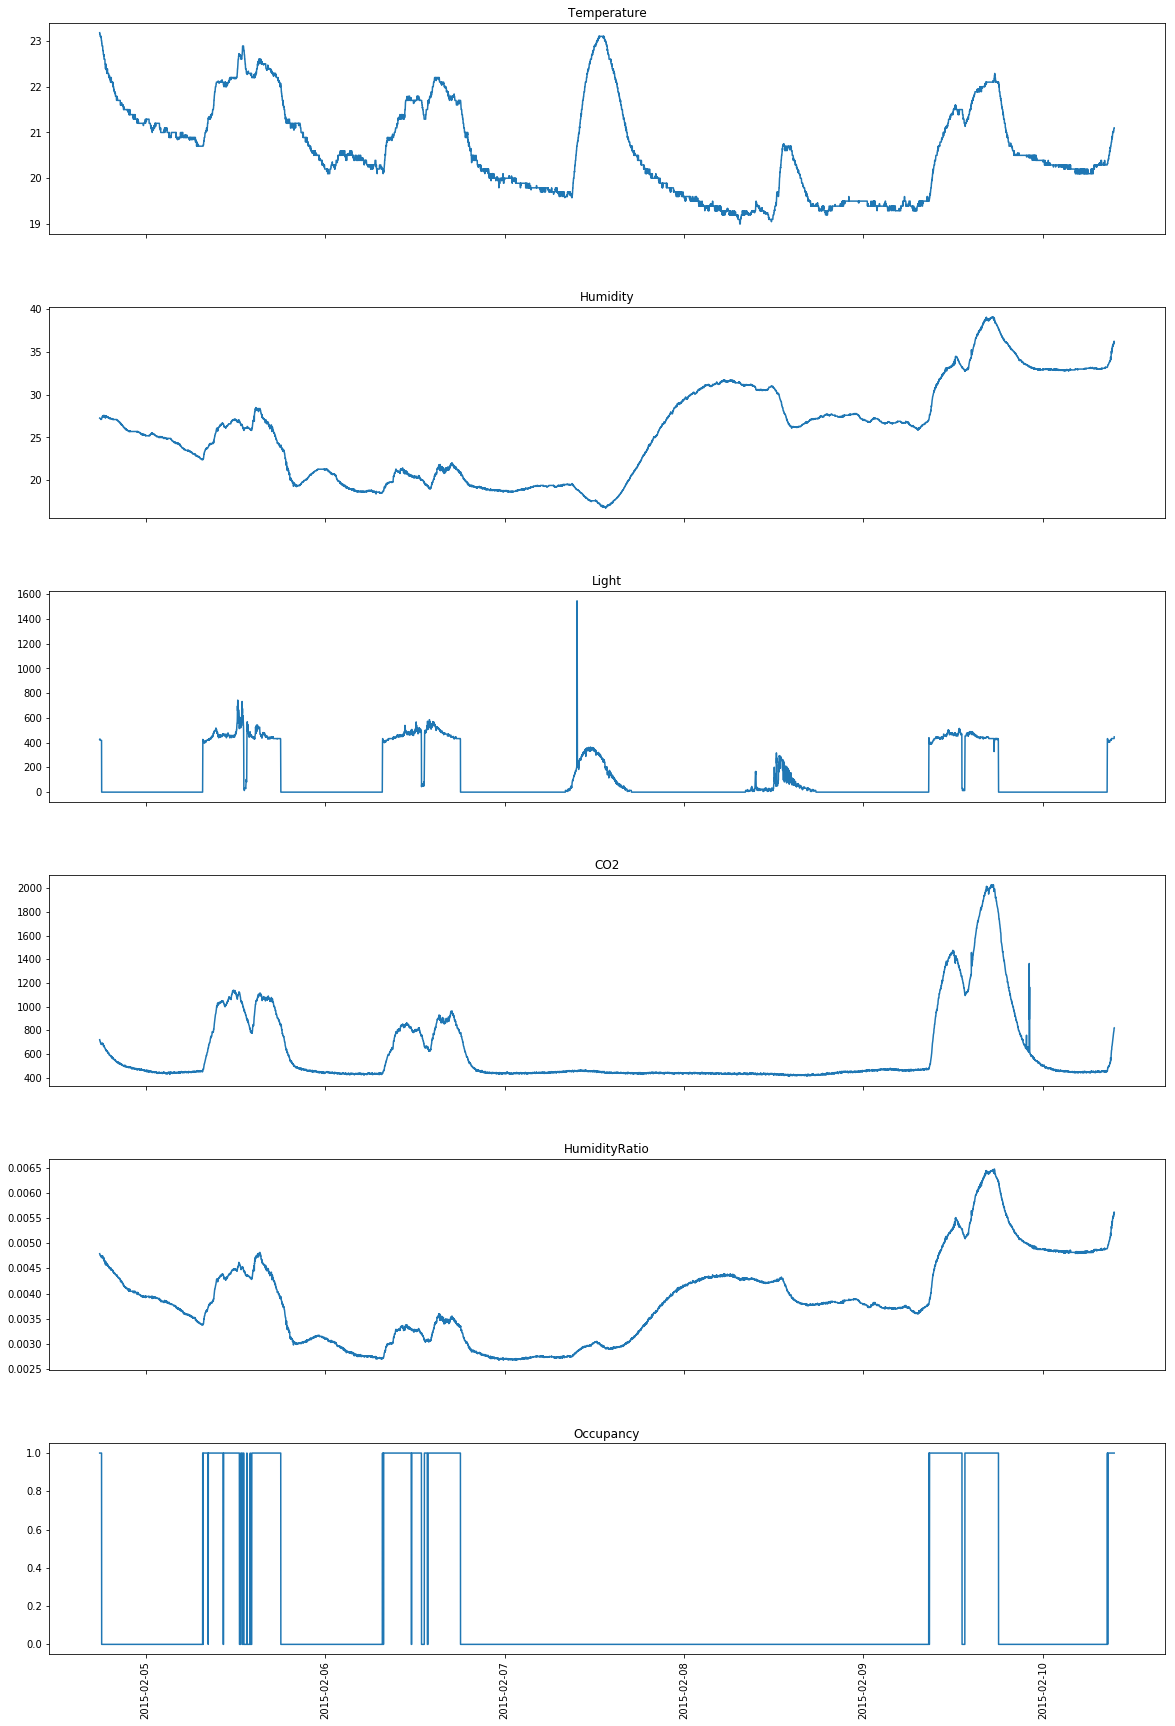

In [61]:
#Essendo 8 variabili e tra loro potenzialmente correlate 
#Creiamo un subplot lungo la medesima verticale 
fig, ax= plt.subplots(df_train.shape[1]-1,sharex=True,figsize=(20,30))
                                                               
for i in range(df_train.shape[1]-1):
    ax[i].plot(df_train.iloc[:,0],df_train.iloc[:,i+1])
    ax[i].set_title(df_train.columns[i+1])
    plt.xticks(rotation='vertical')
    print(df_train.columns[i+1])

plt.subplots_adjust(hspace= 0.35)    
plt.show()

In [40]:
#In questa sezione a scopo puramente didattico 
#per allenarmi con git proverò 
#a importare dei moduli di bokeh ed effettuare il commit dell'elemento
from bokeh.layouts import column 
from bokeh.models import ColumnDataSource, Plot, Select,LinearAxis, Grid, HoverTool
from bokeh.models.glyphs import VBar 
from bokeh.plotting import figure,curdoc 
from bokeh.io import show,push_notebook, output_notebook,output_file 

In [41]:
#Output_notebook() è necessario per visualizzare 
#i grafici all'interno di jupyter notebook 

output_notebook() 

Loading BokehJS ...

In [42]:
#Voglio provare a fare un plot interattivo 
#Selezionando la variabile di interesse
#Viene rappresentato graficamente 
#L'elemento selezionato
df_r=df_train.copy()
#Stiamo cambiando il data type di date
#da Time a String
#Così che ColumnDataSource non da di matto

df_r['date']=df_r['date'].tolist()
source = ColumnDataSource(data=df_r)

#Dobbiamo selezionare tutte le colonne 
#Ad eccezione di quella contenente il tempo che sarà unica per tutti
activity_list=df_train.columns[1:].unique().tolist().copy()
print(activity_list)
print(df_r.date.max())


['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio', 'Occupancy']
2015-02-10 09:33:00


In [46]:
source = ColumnDataSource(data=dict(x=df_r.index,y=df_r[activity_selected]))
print(source.column_names)


['x', 'y']
Light
   Light
1  426.0
2  429.5
3  426.0
4  426.0
5  426.0
<class 'pandas.core.frame.DataFrame'>
HumidityRatio
   HumidityRatio
1       0.004793
2       0.004783
3       0.004779
4       0.004772
5       0.004757
<class 'pandas.core.frame.DataFrame'>
Temperature
   Temperature
1        23.18
2        23.15
3        23.15
4        23.15
5        23.10
<class 'pandas.core.frame.DataFrame'>


In [57]:
activity_selected='Temperature'
#print(df_r.date.iloc[0:10])
df_r['date']=df_r['date'].tolist()
def modify_doc(doc):
    
   
    xrange=[0,df_r.index.max()]
    yrange=[0,df_r[activity_selected].max()]
    source = ColumnDataSource(data=dict(x=df_r.index,y=df_r[activity_selected],date=df_r['date']))
#print(source.data)
    hover=HoverTool(tooltips=[('Date','@date{%F}')],formatters={'date':'datetime'})
    plot=figure(title='Andamento',tools=[hover,'pan','wheel_zoom'], plot_width=400, plot_height=400,x_range=(xrange), y_range=(yrange))
    plot.line(x='x', y="y",source=source)

    def update_plot(attr, old, new):
        activity=select.value
        data=pd.DataFrame(data=df_r[activity], index=df_r.index)
        source.data=ColumnDataSource(data=dict(x=data.index,y=data[activity],date=df_r['date'])).data
        plot.y_range.start=0
        plot.y_range.end=df_r[activity].max()
        print("Your last selection:",select.value)
             
        
     
    select = Select(title='Select Activity', value=activity_selected, options=activity_list)
    select.on_change('value', update_plot)

    layout=column(select, plot)
    doc.add_root(layout)
show(modify_doc)

Your last selection: Humidity
Your last selection: CO2


In [ ]:
#Una analisi della correlazione non sarebbe male 
#Si potrebbe creare un plot che ti permette di selezionare le variabili 
#e in funzione di questa ti plotta la correlazione 
#oltre che a una heat map 


In [ ]:
#Adesso possiamo passare alla parte di Machine Learning
#In primis andiamo a definire due funzioni
#La funzione get_prediction 
#Che effettuerà il training sulla base del
#classificatore scelto 
#E la funzione print_scores
#Che permetterà di valutare 
#sulla base di diversi test_score 
#Il classificatore migliore


def get_predictions(clf, count_train, y_train, count_test):
    # create classifier
    clf = clf
    # fit it to training data
    clf.fit(count_train,y_train)
    # predict using test data
    y_pred = clf.predict(count_test)
    # Compute predicted probabilities: y_pred_prob
    y_pred_prob = clf.predict_proba(count_test)
    #for fun: train-set predictions
    #train_pred = clf.predict(count_test)
    #print('train-set confusion matrix:\n', confusion_matrix(y_train,train_pred)) 
    return y_pred, y_pred_prob
def print_scores(y_test,y_pred,y_pred_prob):
    conf_matrix=confusion_matrix(y_test,y_pred)
    recall= recall_score(y_test,y_pred)
    precision= precision_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)
    accuracy= accuracy_score(y_test,y_pred)
    roc= roc_auc_score(y_test, y_pred_prob[:,1])
    print('test-set confusion matrix:\n',conf_matrix ) 
    print("recall score: ",recall )
    print("precision score: ", precision)
    print("f1 score: ",f1 )
    print("accuracy score: ",   accuracy)
    print("ROC AUC: {}".format(roc_auc_score(y_test, y_pred_prob[:,1])))
    kpi=pd.DataFrame([[recall,precision,f1,accuracy,roc]], columns=['Recall','Precision','F1_Score','Accuracy','ROC-AUC'])
    return kpi

In [87]:
list_classifier=[MultinomialNB(),LogisticRegression(),RandomForestClassifier(),RandomForestClassifier(criterion='entropy')]
names=['MultinomialNaiveBayes','Logistic Regression', 'Random Forest Classifier', 'Random Forest Classifier crit=Entropy']
y_name='Occupancy'

X_train=df_train[df_train.columns.difference([y_name])]
X_test=df_test[df_test.columns.difference([y_name])]
y_train=df_train[y_name]
y_test=df_test[y_name]
print(X_train.describe())
print("len_y train",len(y_train))
print('X Test describe:')
print(X_test.describe())


               CO2     Humidity  HumidityRatio        Light  Temperature
count  8143.000000  8143.000000    8143.000000  8143.000000  8143.000000
mean    606.546243    25.731507       0.003863   119.519375    20.619084
std     314.320877     5.531211       0.000852   194.755805     1.016916
min     412.750000    16.745000       0.002674     0.000000    19.000000
25%     439.000000    20.200000       0.003078     0.000000    19.700000
50%     453.500000    26.222500       0.003801     0.000000    20.390000
75%     638.833333    30.533333       0.004352   256.375000    21.390000
max    2028.500000    39.117500       0.006476  1546.333333    23.180000
len_y train 8143
X Test describe:
               CO2     Humidity  HumidityRatio        Light  Temperature
count  2665.000000  2665.000000    2665.000000  2665.000000  2665.000000
mean    717.906470    25.353937       0.004027   193.227556    21.433876
std     292.681718     2.436842       0.000611   250.210906     1.028024
min     427.50000

In [89]:

for name, clf in zip(names,list_classifier):
        print('Classifier used',name)
        print()
        y_pred, y_pred_prob = get_predictions(clf, X_train, y_train, X_test)
        n_grams=str(i)
        classifier=name
        loop_performance=pd.DataFrame()
        loop_performance=print_scores(y_test,y_pred,y_pred_prob)
        loop_performance['n_grams']=n_grams
        loop_performance['Classifier']=name
        performance=performance.append(loop_performance)
        print('__________________')

Classifier used MultinomialNaiveBayes



NameError: name 'get_predictions' is not defined